In [37]:
#importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import os 

In [42]:
#Carga de data
def load_data():
    df = pd.read_csv("../files/input/shipping-data.csv", sep=",")
    return df

def create_visual_for_shipping_per_warehouse(df):
    df_copy = df.copy()
    plt.figure()
    counts = df_copy.Warehouse_block.value_counts()
    counts.plot.bar(
        title = "Shipping per Warehouse",
        xlabel = "Warehouse block",
        ylabel = "Record Count",
        color = "tab:blue",
        fontsize=8,
    )
    #Eliminacion de bordes
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    #Guardamos grafica
    if not os.path.exists("../doc"):
        os.makedirs("../doc")
    plt.savefig("../doc/shipping_per_warehouse.png")
    #plt.savefig("sss")

def create_visual_for_mode_of_shipment(df):
    df_copy = df.copy()
    plt.figure()
    counts = df_copy.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title = "Mode_of_Shipment",
        wedgeprops=dict(width=0.35),
        ylabel = "",
        color = ["tab:blue", "tab:orange", "tab:green"],
    )
    #Eliminacion de bordes
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    #Guardamos grafica
    if not os.path.exists("../doc"):
        os.makedirs("../doc")
    plt.savefig("../doc/mode_of_shipment.png")
 
def create_visual_for_average_customer_ranting(df):
    df_copy = df.copy()
    plt.figure()
    df_copy = (df_copy[["Mode_of_Shipment", "Customer_rating"]].groupby("Mode_of_Shipment").describe())
    df_copy.columns = df_copy.columns.droplevel()
    df_copy = df_copy[["mean","min","max"]]
    plt.barh(y=df_copy.index.values, 
            width=df_copy["max"].values-1,
            left=df_copy["min"].values,
            height=0.9,
            color="lightgray",
            alpha=0.8,
            )
    colors = ["tab:green" if value >= 3.0 else "tab:orange" for value in df_copy["mean"].values]
    plt.barh(y=df_copy.index.values, 
             width=df_copy["mean"].values-1,
             left=df_copy["min"].values,
             color=colors,
             height=0.5,
             alpha=1.0,
             )
    plt.title("Average Customer Rating")
    plt.gca().spines["left"].set_color("gray")   
    plt.gca().spines["bottom"].set_color("gray")   
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    #Guardamos grafica
    if not os.path.exists("../doc"):
        os.makedirs("../doc")
    plt.savefig("../doc/average_customer_rating.png")


def create_visual_for_weight_distribution(df):
    df_copy = df.copy()
    plt.figure()
    df_copy.Weight_in_gms.plot.hist(
        title="Shipped Weight Distribution",
        color="Tab:orange",
        edgecolor="white",
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    #Guardamos grafica
    if not os.path.exists("../doc"):
        os.makedirs("../doc")
    plt.savefig("../doc/weight_distribution.png")
    


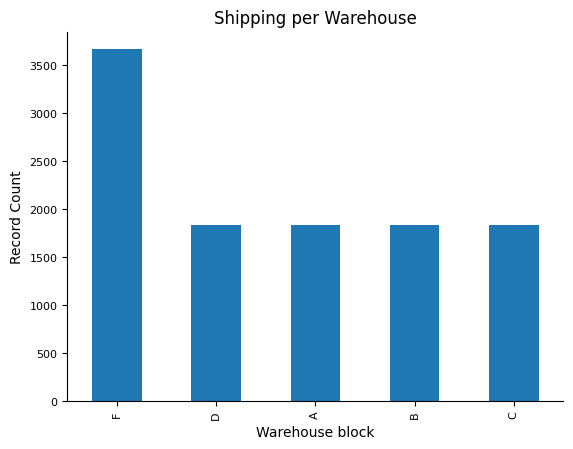

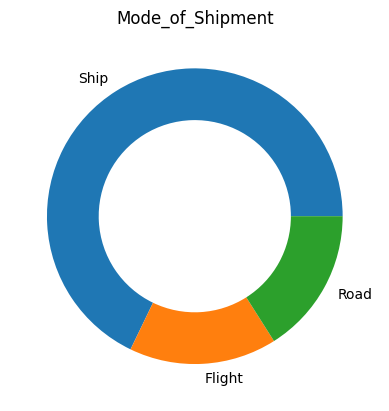

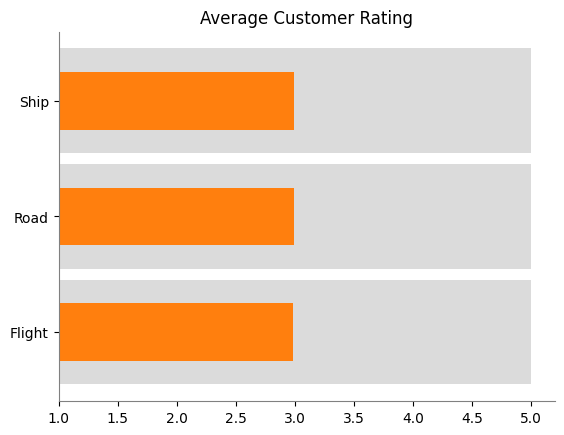

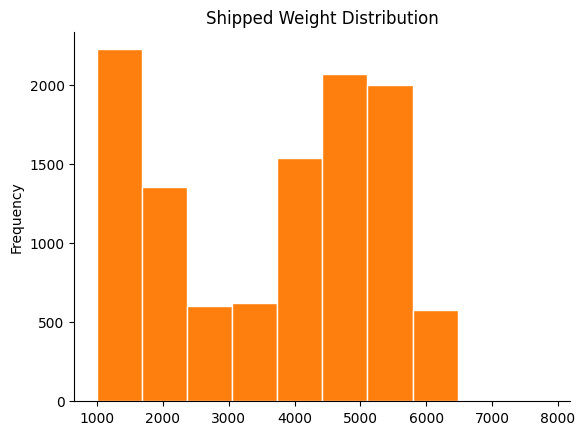

In [43]:
df = load_data()
create_visual_for_shipping_per_warehouse(df)
create_visual_for_mode_of_shipment(df)
create_visual_for_average_customer_ranting(df)
create_visual_for_weight_distribution(df)

In [45]:
%%writefile index.html

<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div style="width:45%;float:left">
            <img src="./docs/shipping_per_warehouse.png" alt="Fig 1">
            <img src="./docs/mode_of_shipment.png" alt="Fig 2">
        </div>
        <div style="width:45%;float:left">
            <img src="./docs/average_customer_rating.png" alt="Fig 3">
            <img src="./docs/weight_distribution.png" alt="Fig 4">            
        </div>    
    </body>
</html>  

Writing index.html
